In [33]:
# import data

import re
import pandas as pd
import numpy as np
import sqlite3

# read database, change path and database name if needed
conn = sqlite3.connect('final_db_2.db')
cursor = conn.cursor()
result = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

In [34]:
# find table names - match data
table_names = sorted(list(zip(*result))[0])

# create first table
test_name = table_names[0]
data = pd.read_sql("SELECT * FROM '{}'".format(test_name), conn)

# append all match stats to one table
for name in table_names[1:]:
    data_i = pd.read_sql("SELECT * FROM '{}'".format(name), conn)
    data = pd.concat([data, data_i])

In [35]:
data = data.drop(columns = ['Team_name_home', 'Round_home', 'Team_name_away', 'Year_away', 'Round_away', 
                            'Results_away', 'Round_diff', 'Year_diff', 'Team_name_diff' ]) 
# only need result home 

In [36]:
data[data.isna().any(axis=1)]

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
687,55.0,76.0,13.0,4.0,-0.12,45.0,5.0,55.0,31.0,69.0,...,-12.0,3.0,1.0,-1.0,3.0,-3.0,24.0,-12.0,0.50,0.00
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-25.0,4.0,2.0,-2.0,4.0,-4.0,15.0,-25.0,0.56,0.11
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-14.0,17.0,0.00,0.50
921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,-3.0,-1.0,1.0,-3.0,3.0,-20.0,17.0,0.00,0.50
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,-3.0,-1.0,1.0,-3.0,3.0,-13.0,6.0,0.33,0.67
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-88.0,-3.0,-1.0,0.0,-3.0,-1.0,-98.0,-88.0,0.00,0.50
1298,69.0,104.0,16.0,3.0,-0.12,81.0,5.0,49.0,25.0,108.0,...,8.0,1.0,0.0,0.0,1.0,0.0,13.0,8.0,0.17,0.00
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,3.0,1.0,-1.0,2.0,-2.0,9.0,-3.0,0.50,0.00
1459,72.0,107.0,26.0,8.0,-14.00,76.0,5.0,47.0,19.0,103.0,...,-13.0,1.0,1.0,-1.0,1.0,-1.0,-8.0,-13.0,0.33,0.17
1460,85.0,104.0,19.0,9.0,-4.00,97.0,6.0,40.0,13.0,136.0,...,-7.0,0.0,0.0,0.0,0.0,0.0,-9.0,-7.0,0.33,0.33


In [37]:
data = data.dropna()
# check missing values for each of the variables
data.isnull().sum()

AVG_1_Points_home           0
AVG_1_Serve_number_home     0
AVG_1_Serve_errors_home     0
AVG_1_Serve_aces_home       0
AVG_1_Serve_%_effic_home    0
                           ..
Last_5_Sets_lost_diff       0
Last_5_Points_won_diff      0
Last_5_Points_lost_diff     0
%_points_poss_home          0
%_points_poss_away          0
Length: 278, dtype: int64

In [38]:
data.head()

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_3_Points_lost_diff,Last_5_Points_diff,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away
0,56.0,85.0,17.0,0.0,-0.20,87.0,7.0,55.0,28.0,115.0,...,32.0,-2.0,-1.0,1.0,0.0,2.0,37.0,32.0,0.11,0.33
1,33.0,55.0,10.0,3.0,-0.13,55.0,5.0,61.0,27.0,68.0,...,-26.0,-2.0,-1.0,1.0,-3.0,1.0,-49.0,-26.0,0.00,0.33
2,33.0,55.0,14.0,2.0,-0.22,58.0,5.0,44.0,22.0,72.0,...,-28.0,-1.0,0.0,0.0,-2.0,0.0,-47.0,-28.0,0.00,0.17
3,71.0,106.0,15.0,5.0,-0.09,87.0,2.0,70.0,43.0,138.0,...,60.0,-2.0,-1.0,1.0,-1.0,3.0,32.0,60.0,0.17,0.50
4,71.0,93.0,18.0,10.0,-0.09,81.0,3.0,56.0,38.0,117.0,...,-14.0,1.0,0.0,0.0,0.0,-1.0,-20.0,-14.0,0.50,0.33


In [39]:
# define columns' names
new_col2 = ['AVG_1_Points_home',
 'AVG_1_Serve_number_home',
 'AVG_1_Serve_errors_home',
 'AVG_1_Serve_aces_home',
 'AVG_1_Serve_%_effic_home',
 'AVG_1_Rec_number_home',
 'AVG_1_Rec_errors_home',
 'AVG_1_Rec_%_pos_home',
 'AVG_1_Rec_%_perf_home',
 'AVG_1_Atack_number_home',
 'AVG_1_Atack_error_home',
 'AVG_1_Atack_blocked_home',
 'AVG_1_Atack_%_eff_home',
 'AVG_1_Block_points_home',
 'AVG_1_Points_net_home',
 'AVG_3_Points_home',
 'AVG_3_Serve_number_home',
 'AVG_3_Serve_errors_home',
 'AVG_3_Serve_aces_home',
 'AVG_3_Serve_%_effic_home',
 'AVG_3_Rec_number_home',
 'AVG_3_Rec_errors_home',
 'AVG_3_Rec_%_pos_home',
 'AVG_3_Rec_%_perf_home',
 'AVG_3_Atack_number_home',
 'AVG_3_Atack_error_home',
 'AVG_3_Atack_blocked_home',
 'AVG_3_Atack_%_eff_home',
 'AVG_3_Block_points_home',
 'AVG_3_Points_net_home',
 'AVG_5_Points_home',
 'AVG_5_Serve_number_home',
 'AVG_5_Serve_errors_home',
 'AVG_5_Serve_aces_home',
 'AVG_5_Serve_%_effic_home',
 'AVG_5_Rec_number_home',
 'AVG_5_Rec_errors_home',
 'AVG_5_Rec_%_pos_home',
 'AVG_5_Rec_%_perf_home',
 'AVG_5_Atack_number_home',
 'AVG_5_Atack_error_home',
 'AVG_5_Atack_blocked_home',
 'AVG_5_Atack_%_eff_home',
 'AVG_5_Block_points_home',
 'AVG_5_Points_net_home',
 'Height_avg_home',
 'Weight_avg_home',
 'Range_avg_home',
 'Opposite_Height_home',
 'Libero_Height_home',
 'Outside_Height_home',
 'Setter_Height_home',
 'Middle_Height_home',
 'Opposite_Weight_home',
 'Libero_Weight_home',
 'Outside_Weight_home',
 'Setter_Weight_home',
 'Middle_Weight_home',
 'Opposite_Range_home',
 'Libero_Range_home',
 'Outside_Range_home',
 'Setter_Range_home',
 'Middle_Range_home',
 'Points_home',
 'Matches_won_home',
 'Matches_lost_home',
 'Sets_won_home',
 'Sets_lost_home',
 'Points_won_home',
 'Points_lost_home',
 'Last_1_Points_home',
 'Last_1_Matches_won_home',
 'Last_1_Matches_lost_home',
 'Last_1_Sets_won_home',
 'Last_1_Sets_lost_home',
 'Last_1_Points_won_home',
 'Last_1_Points_lost_home',
 'Last_3_Points_home',
 'Last_3_Matches_won_home',
 'Last_3_Matches_lost_home',
 'Last_3_Sets_won_home',
 'Last_3_Sets_lost_home',
 'Last_3_Points_won_home',
 'Last_3_Points_lost_home',
 'Last_5_Points_home',
 'Last_5_Matches_won_home',
 'Last_5_Matches_lost_home',
 'Last_5_Sets_won_home',
 'Last_5_Sets_lost_home',
 'Last_5_Points_won_home',
 'Last_5_Points_lost_home',
 'ID',
 'Year_home',
 'Results_home',
 'AVG_1_Points_away',
 'AVG_1_Serve_number_away',
 'AVG_1_Serve_errors_away',
 'AVG_1_Serve_aces_away',
 'AVG_1_Serve_%_effic_away',
 'AVG_1_Rec_number_away',
 'AVG_1_Rec_errors_away',
 'AVG_1_Rec_%_pos_away',
 'AVG_1_Rec_%_perf_away',
 'AVG_1_Atack_number_away',
 'AVG_1_Atack_error_away',
 'AVG_1_Atack_blocked_away',
 'AVG_1_Atack_%_eff_away',
 'AVG_1_Block_points_away',
 'AVG_1_Points_net_away',
 'AVG_3_Points_away',
 'AVG_3_Serve_number_away',
 'AVG_3_Serve_errors_away',
 'AVG_3_Serve_aces_away',
 'AVG_3_Serve_%_effic_away',
 'AVG_3_Rec_number_away',
 'AVG_3_Rec_errors_away',
 'AVG_3_Rec_%_pos_away',
 'AVG_3_Rec_%_perf_away',
 'AVG_3_Atack_number_away',
 'AVG_3_Atack_error_away',
 'AVG_3_Atack_blocked_away',
 'AVG_3_Atack_%_eff_away',
 'AVG_3_Block_points_away',
 'AVG_3_Points_net_away',
 'AVG_5_Points_away',
 'AVG_5_Serve_number_away',
 'AVG_5_Serve_errors_away',
 'AVG_5_Serve_aces_away',
 'AVG_5_Serve_%_effic_away',
 'AVG_5_Rec_number_away',
 'AVG_5_Rec_errors_away',
 'AVG_5_Rec_%_pos_away',
 'AVG_5_Rec_%_perf_away',
 'AVG_5_Atack_number_away',
 'AVG_5_Atack_error_away',
 'AVG_5_Atack_blocked_away',
 'AVG_5_Atack_%_eff_away',
 'AVG_5_Block_points_away',
 'AVG_5_Points_net_away',
 'Height_avg_away',
 'Weight_avg_away',
 'Range_avg_away',
 'Opposite_Height_away',
 'Libero_Height_away',
 'Outside_Height_away',
 'Setter_Height_away',
 'Middle_Height_away',
 'Opposite_Weight_away',
 'Libero_Weight_away',
 'Outside_Weight_away',
 'Setter_Weight_away',
 'Middle_Weight_away',
 'Opposite_Range_away',
 'Libero_Range_away',
 'Outside_Range_away',
 'Setter_Range_away',
 'Middle_Range_away',
 'Points_away',
 'Matches_won_away',
 'Matches_lost_away',
 'Sets_won_away',
 'Sets_lost_away',
 'Points_won_away',
 'Points_lost_away',
 'Last_1_Points_away',
 'Last_1_Matches_won_away',
 'Last_1_Matches_lost_away',
 'Last_1_Sets_won_away',
 'Last_1_Sets_lost_away',
 'Last_1_Points_won_away',
 'Last_1_Points_lost_away',
 'Last_3_Points_away',
 'Last_3_Matches_won_away',
 'Last_3_Matches_lost_away',
 'Last_3_Sets_won_away',
 'Last_3_Sets_lost_away',
 'Last_3_Points_won_away',
 'Last_3_Points_lost_away',
 'Last_5_Points_away',
 'Last_5_Matches_won_away',
 'Last_5_Matches_lost_away',
 'Last_5_Sets_won_away',
 'Last_5_Sets_lost_away',
 'Last_5_Points_won_away',
 'Last_5_Points_lost_away',
 'AVG_1_Points_diff',
 'AVG_1_Serve_number_diff',
 'AVG_1_Serve_errors_diff',
 'AVG_1_Serve_aces_diff',
 'AVG_1_Serve_%_effic_diff',
 'AVG_1_Rec_number_diff',
 'AVG_1_Rec_errors_diff',
 'AVG_1_Rec_%_pos_diff',
 'AVG_1_Rec_%_perf_diff',
 'AVG_1_Atack_number_diff',
 'AVG_1_Atack_error_diff',
 'AVG_1_Atack_blocked_diff',
 'AVG_1_Atack_%_eff_diff',
 'AVG_1_Block_points_diff',
 'AVG_1_Points_net_diff',
 'AVG_3_Points_diff',
 'AVG_3_Serve_number_diff',
 'AVG_3_Serve_errors_diff',
 'AVG_3_Serve_aces_diff',
 'AVG_3_Serve_%_effic_diff',
 'AVG_3_Rec_number_diff',
 'AVG_3_Rec_errors_diff',
 'AVG_3_Rec_%_pos_diff',
 'AVG_3_Rec_%_perf_diff',
 'AVG_3_Atack_number_diff',
 'AVG_3_Atack_error_diff',
 'AVG_3_Atack_blocked_diff',
 'AVG_3_Atack_%_eff_diff',
 'AVG_3_Block_points_diff',
 'AVG_3_Points_net_diff',
 'AVG_5_Points_diff',
 'AVG_5_Serve_number_diff',
 'AVG_5_Serve_errors_diff',
 'AVG_5_Serve_aces_diff',
 'AVG_5_Serve_%_effic_diff',
 'AVG_5_Rec_number_diff',
 'AVG_5_Rec_errors_diff',
 'AVG_5_Rec_%_pos_diff',
 'AVG_5_Rec_%_perf_diff',
 'AVG_5_Atack_number_diff',
 'AVG_5_Atack_error_diff',
 'AVG_5_Atack_blocked_diff',
 'AVG_5_Atack_%_eff_diff',
 'AVG_5_Block_points_diff',
 'AVG_5_Points_net_diff',
 'Height_avg_diff',
 'Weight_avg_diff',
 'Range_avg_diff',
 'Opposite_Height_diff',
 'Libero_Height_diff',
 'Outside_Height_diff',
 'Setter_Height_diff',
 'Middle_Height_diff',
 'Opposite_Weight_diff',
 'Libero_Weight_diff',
 'Outside_Weight_diff',
 'Setter_Weight_diff',
 'Middle_Weight_diff',
 'Opposite_Range_diff',
 'Libero_Range_diff',
 'Outside_Range_diff',
 'Setter_Range_diff',
 'Middle_Range_diff',
 'Points_diff',
 'Matches_won_diff',
 'Matches_lost_diff',
 'Sets_won_diff',
 'Sets_lost_diff',
 'Points_won_diff',
 'Points_lost_diff',
 'Last_1_Points_diff',
 'Last_1_Matches_won_diff',
 'Last_1_Matches_lost_diff',
 'Last_1_Sets_won_diff',
 'Last_1_Sets_lost_diff',
 'Last_1_Points_won_diff',
 'Last_1_Points_lost_diff',
 'Last_3_Points_diff',
 'Last_3_Matches_won_diff',
 'Last_3_Matches_lost_diff',
 'Last_3_Sets_won_diff',
 'Last_3_Sets_lost_diff',
 'Last_3_Points_won_diff',
 'Last_3_Points_lost_diff',
 'Last_5_Points_diff',
 'Last_5_Matches_won_diff',
 'Last_5_Matches_lost_diff',
 'Last_5_Sets_won_diff',
 'Last_5_Sets_lost_diff',
 'Last_5_Points_won_diff',
 'Last_5_Points_lost_diff',
 '%_points_poss_home',
 '%_points_poss_away',
 '%_points_poss_diff']

In [40]:
data['%_points_poss_diff'] = data['%_points_poss_home'] - data['%_points_poss_away']

In [41]:
data.columns = new_col2

In [42]:
# define column with the result
df1 = data.pop('Results_home') 
data['Result']=df1 

In [43]:
train = data[data['Year_home'].isin(['2019/2020', '2018/2019', '2017/2018', '2016/2017', '2015/2016', '2014/2015', '2013/2014', 
        '2012/2013', '2011/2012', '2010/2011'])]

In [44]:
test = data[data['Year_home'] == ('2020/2021')]

In [45]:
out_of_time = data[data['Year_home'] == ('2021/2022')]

In [46]:
y_train = train['Result']

In [47]:
y_test = test['Result']

In [48]:
y_oot = out_of_time['Result']

In [49]:
X_train =  train.drop(columns=['ID', 'Result', 'Year_home'])

In [50]:
X_test = test.drop(columns=['ID', 'Result', 'Year_home'])

In [51]:
X_oot = out_of_time.drop(columns=['ID', 'Result', 'Year_home'])

In [52]:
print(y_train.value_counts(normalize=True))  
print(y_test.value_counts(normalize=True))

1.0    0.544452
0.0    0.455548
Name: Result, dtype: float64
1.0    0.514451
0.0    0.485549
Name: Result, dtype: float64


In [67]:
train

,AVG_1_Points_home,AVG_1_Serve_number_home,AVG_1_Serve_errors_home,AVG_1_Serve_aces_home,AVG_1_Serve_%_effic_home,AVG_1_Rec_number_home,AVG_1_Rec_errors_home,AVG_1_Rec_%_pos_home,AVG_1_Rec_%_perf_home,AVG_1_Atack_number_home,...,Last_5_Matches_won_diff,Last_5_Matches_lost_diff,Last_5_Sets_won_diff,Last_5_Sets_lost_diff,Last_5_Points_won_diff,Last_5_Points_lost_diff,%_points_poss_home,%_points_poss_away,%_points_poss_diff,Result
0,56.0,85.0,17.0,0.0,-0.20,87.0,7.0,55.0,28.0,115.0,...,-1.0,1.0,0.0,2.0,37.0,32.0,0.11,0.33,-0.22,1.0
1,33.0,55.0,10.0,3.0,-0.13,55.0,5.0,61.0,27.0,68.0,...,-1.0,1.0,-3.0,1.0,-49.0,-26.0,0.00,0.33,-0.33,1.0
2,33.0,55.0,14.0,2.0,-0.22,58.0,5.0,44.0,22.0,72.0,...,0.0,0.0,-2.0,0.0,-47.0,-28.0,0.00,0.17,-0.17,1.0
3,71.0,106.0,15.0,5.0,-0.09,87.0,2.0,70.0,43.0,138.0,...,-1.0,1.0,-1.0,3.0,32.0,60.0,0.17,0.50,-0.33,0.0
4,71.0,93.0,18.0,10.0,-0.09,81.0,3.0,56.0,38.0,117.0,...,0.0,0.0,0.0,-1.0,-20.0,-14.0,0.50,0.33,0.17,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,80.0,99.0,17.0,13.0,-0.04,64.0,2.0,59.0,32.0,102.0,...,-2.0,2.0,-5.0,4.0,-16.0,32.0,0.62,0.53,0.09,1.0
1455,55.0,77.0,11.0,9.0,-0.03,50.0,5.0,52.0,20.0,62.0,...,0.0,0.0,-1.0,2.0,11.0,41.0,0.78,0.43,0.35,1.0
1456,59.0,81.0,15.0,5.0,-0.12,58.0,1.0,51.0,20.0,87.0,...,1.0,-1.0,5.0,-5.0,20.0,-33.0,0.81,0.35,0.46,1.0
1457,47.0,64.0,14.0,5.0,-0.14,66.0,9.0,54.0,15.0,68.0,...,1.0,-1.0,4.0,-1.0,67.0,17.0,0.32,0.21,0.11,1.0


In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import roc_auc_score

In [54]:
# create GBM model
ab_clf = AdaBoostClassifier(random_state=30)

In [55]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=5, verbose=1, n_jobs=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=30), n_jobs=1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             verbose=1)

In sample set score: 0.724
Out of sample set score: 0.711


In [59]:
y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

In [ ]:
# print the scores on training and test set

print('In sample set score: {:.3f}'.format(clf.score(X_train, y_train)))

print('Out of sample set score: {:.3f}'.format(clf.score(X_test, y_test)))

In [61]:
print('In sample set auc: {:.3f}'.format(roc_auc_train))

print('Out of sample set auc: {:.3f}'.format(roc_auc_test))

In sample set auc: 0.795
Out of sample set auc: 0.741


In [ ]:
y_oot_pred = clf.predict_proba(X_oot)[:,1]

In [ ]:
print('Out of time accuracy: {:.4f}'.format(clf.score(X_oot, y_oot)))
print('Out of time set AUC: {:.4f}'.format(roc_auc_score(y_oot, y_oot_pred)))

In [64]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ab_clf, X_train, y_train, cv=10,
                                                        scoring='accuracy', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 100))

train_mean = np.mean(train_scores, axis=1)
validation_mean = np.mean(test_scores, axis=1)

<ipython-input-65-f15b17680584>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


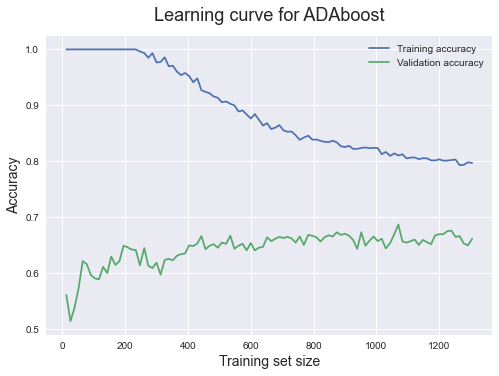

In [65]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for ADAboost', fontsize = 18, y = 1.03)
plt.legend();